In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.cross_validation import LeaveOneOut
from sklearn import cross_validation

In [4]:
df = pd.read_csv("data/combined.csv")

<a href="http://stackoverflow.com/questions/7586384/color-states-with-pythons-matplotlib-basemap">Color States with Python's Matplotlib Basemap</a>

In [10]:
# predict using Leave One Out train/test splits
def predict_loo(x_col_names, df, model):    
    loo = LeaveOneOut(len(df))
    scores = []
    for train, test in loo:        
        x_train = df.iloc[train][x_col_names].values.reshape(-1,2)
        print x_train
        y_train = df.iloc[train]["murder_rate"].values.reshape(-1,1)
        model.fit(x_train, y_train)        
        x_test = df.iloc[test][x_col_names].values.reshape(-1,2)                
        est = model.predict(x_test)
        scores.append(est)        
    return scores

In [11]:
# compute residuals
def residuals(truth, predicted):
    res = []
    for t,r in zip(truth, predicted):
        res.append(t - r)
    return res


[[  8.6  10. ]
 [ 15.8  15.2]
 [ 17.6  15.9]
 [ 19.4  13.2]
 [ 10.7  11.4]
 [ 11.4   9.7]
 [ 12.6   9.2]
 [ 14.7  11.1]
 [ 16.1  14.4]
 [  9.6   8.6]
 [ 11.6   9.9]
 [ 13.6  11.5]
 [ 13.4  12.6]
 [  9.5  11.3]
 [ 10.3  12.5]
 [ 18.3  14.8]
 [ 17.8  18.3]
 [  9.8  12.6]
 [ 11.8   9.7]
 [ 11.   10.1]
 [ 12.1  12. ]
 [  8.5   8.1]
 [ 19.6  20.1]
 [ 13.2  11.6]
 [  9.2  13.8]
 [ 10.2   9.5]
 [ 16.1  10.6]
 [  8.7   5.6]
 [ 12.6   6.8]
 [ 17.2  17.9]
 [ 15.3  14.5]
 [ 15.7  13.1]
 [  9.9  11.2]
 [ 12.4  12.3]
 [ 14.4  15.6]
 [ 10.9  12. ]
 [ 12.1  11.2]
 [ 15.3  12.1]
 [ 16.4  15. ]
 [ 10.1  11.8]
 [ 16.9  15. ]
 [ 20.1  16.2]
 [  9.6   9.2]
 [  9.    7.6]
 [ 13.4   9.2]
 [ 10.3  10.2]
 [ 17.2  15.4]
 [ 10.2  10.2]
 [  8.2  10.6]]
[[ 17.9  16.7]
 [ 15.8  15.2]
 [ 17.6  15.9]
 [ 19.4  13.2]
 [ 10.7  11.4]
 [ 11.4   9.7]
 [ 12.6   9.2]
 [ 14.7  11.1]
 [ 16.1  14.4]
 [  9.6   8.6]
 [ 11.6   9.9]
 [ 13.6  11.5]
 [ 13.4  12.6]
 [  9.5  11.3]
 [ 10.3  12.5]
 [ 18.3  14.8]
 [ 17.8  18.3]
 [  9.8  

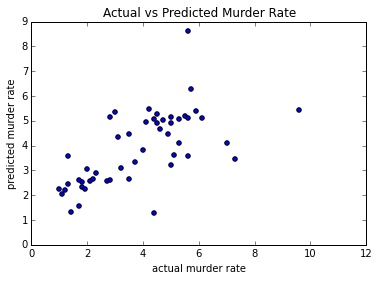

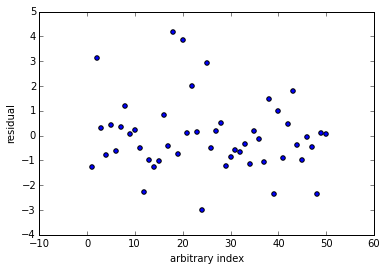

In [12]:

# model for testing: Polynomial of degree 4 with Lasso using alpha 0.2
model = make_pipeline(PolynomialFeatures(4), Lasso(alpha=0.2, max_iter=1000))
    
# run LOO model using single feature
predicted = predict_loo(["no_high_school", "poverty_rate"], df, model)            

truth = df["murder_rate"].values
        
# plot actual vs predicted murder rate
plt.scatter(truth, predicted)
plt.xlabel("actual murder rate")
plt.ylabel("predicted murder rate")
plt.title("Actual vs Predicted Murder Rate")
plt.show()

# compute residuals
res = residuals(truth, predicted)

# plot residuals
plt.scatter(range(1,51), res)
plt.xlabel("arbitrary index")
plt.ylabel("residual")
plt.show()

In [ ]:
# TODO: regression with multiple columns

In [ ]:
# TODO: grid search to find optimal parameters

# TODO: find optimal...
# num degrees in polynomial
# alpha value

# TODO: models to try (David)
# RandomForestRegressor
# other ensemble tree